In [3]:
import numpy as np
import matplotlib.pyplot as plt


# Riemann problem

In [4]:
def lax_friedrichs(xlin, f, cfl):
    u_0 = np.array([init_cond(x) for x in xlin])
    u_max = np.max(u_0)
    u_min = np.min(u_0)
    dx = np.abs(np.min(xlin)-np.max(xlin))/xlin.shape[0]
    print(dx)
    # Get length of initial value array
    position_steps = u_0.shape[0]
    time_steps = position_steps
    
    # Allocate matrix for the solution
    u = np.zeros((position_steps, time_steps))

    # Hard coded step size
    dt = np.abs(2*dx*cfl)
    print(dt)
    
    # Write initial value in solution matrix
    u[:,0] = u_0
    
    # Iterate through time steps
    for n in range(1,time_steps):
            for i in range(1, position_steps-1):
                u[i][n] = 0.5*(u[i-1][n-1]+u[i+1][n-1])-dt/(2*dx)*(f(u[i+1][n-1])-f(u[i-1][n-1]))
                
            # constant boundary condtions
            # First
            u[0][n] = 0.5*(u[-2][n-1]+u[1][n-1])-dt/(2*dx)*(f(u[1][n-1])-f(u[-2][n-1]))
            # Last
            u[-1][n] = u[0][n]
    return u  

In [5]:
def lax_wendroff(u_0, f, cfl):
    u_0 = np.array([init_cond(x) for x in xlin])
    u_max = np.max(u_0)
    u_min = np.min(u_0)
    dx = np.abs(np.min(xlin)-np.max(xlin))/xlin.shape[0]
    print(dx)
    # Get length of initial value array
    position_steps = u_0.shape[0]
    time_steps = position_steps
    
    # Allocate matrix for the solution
    u = np.zeros((position_steps, time_steps))

    # Hard coded step size
    dt = np.abs(2*dx*cfl)
    print(dt)
    
    # Write initial value in solution matrix
    u[:,0] = u_0
    
    # Iterate through time steps
    for n in range(1,time_steps):
            for i in range(1, position_steps-1):
                u_half_plus = 0.5*(u[i][n-1]+u[i+1][n-1])-dt/(2*dx)*(f(u[i+1][n-1])-f(u[i][n-1]))
                u_half_minus = 0.5*(u[i][n-1]+u[i-1][n-1])-dt/(2*dx)*(f(u[i][n-1])-f(u[i-1][n-1]))
                u[i][n] = u[i][n-1]-dt/dx*(f(u_half_plus) - f(u_half_minus))
            # Periodic boundary condtions
            # First
            u_half_plus = 0.5*(u[0][n-1]+u[1][n-1])-dt/(2*dx)*(f(u[1][n-1])-f(u[0][n-1]))
            u_half_minus = 0.5*(u[0][n-1]+u[-2][n-1])-dt/(2*dx)*(f(u[0][n-1])-f(u[-2][n-1]))
            u[0][n] = u[0][n-1]-dt/dx*(f(u_half_plus) - f(u_half_minus))
            # Last
            u[-1][n] = u[0][n]          
    return u  

## a) I)

In [6]:
def init_cond(x):
    if x <= 0: return -1
    else: return 3

def function(x):
    return x

0.02
0.02
[[-1.  3.  3. ... -1. -1. -1.]
 [-1. -1.  3. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 ...
 [ 3.  3.  3. ... -1.  3.  3.]
 [ 3.  3.  3. ... -1. -1.  3.]
 [ 3.  3.  3. ... -1. -1. -1.]]


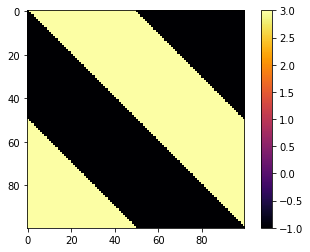

In [8]:
xlin = np.linspace(-1,1,100)
u_0 = np.array([init_cond(x) for x in xlin])
sol = lax_friedrichs(xlin, function, 0.5)
print(sol)
plt.imshow(sol, cmap="inferno")
plt.colorbar()

stable

0.02
0.02
[[-1.  3.  3. ... -1. -1. -1.]
 [-1. -1.  3. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 ...
 [ 3.  3.  3. ... -1.  3.  3.]
 [ 3.  3.  3. ... -1. -1.  3.]
 [ 3.  3.  3. ... -1. -1. -1.]]


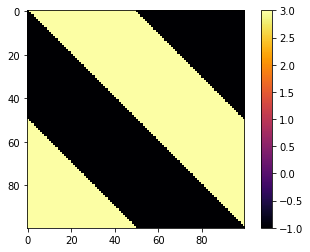

In [204]:
xlin = np.linspace(-1,1,100)
u_0 = np.array([init_cond(x) for x in xlin])
sol = lax_wendroff(xlin, function, 0.5)
print(sol)
plt.imshow(sol, cmap="inferno")
plt.colorbar()

stable

## a) II)

In [9]:
def init_cond(x):
    if x <= 0: return 3
    else: return -1

def function(x):
    return x

0.02
0.02
[[ 3. -1. -1. ...  3.  3.  3.]
 [ 3.  3. -1. ...  3.  3.  3.]
 [ 3.  3.  3. ...  3.  3.  3.]
 ...
 [-1. -1. -1. ...  3. -1. -1.]
 [-1. -1. -1. ...  3.  3. -1.]
 [-1. -1. -1. ...  3.  3.  3.]]


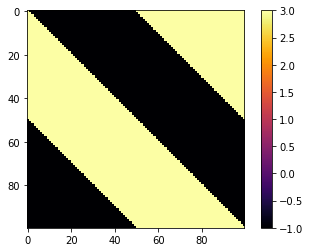

In [10]:
xlin = np.linspace(-1,1,100)
u_0 = np.array([init_cond(x) for x in xlin])
sol = lax_friedrichs(xlin, function, 0.5)
print(sol)
plt.imshow(sol, cmap="inferno")
plt.colorbar()

stable

0.02
0.02
[[ 3. -1. -1. ...  3.  3.  3.]
 [ 3.  3. -1. ...  3.  3.  3.]
 [ 3.  3.  3. ...  3.  3.  3.]
 ...
 [-1. -1. -1. ...  3. -1. -1.]
 [-1. -1. -1. ...  3.  3. -1.]
 [-1. -1. -1. ...  3.  3.  3.]]


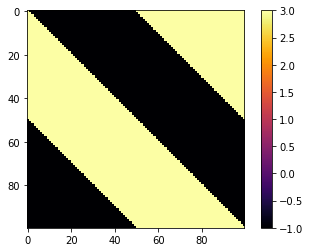

In [11]:
xlin = np.linspace(-1,1,100)
u_0 = np.array([init_cond(x) for x in xlin])
sol = lax_wendroff(xlin, function, 0.5)
print(sol)
plt.imshow(sol, cmap="inferno")
plt.colorbar()

stable

## b) I)

In [12]:
def init_cond(x):
    if x <= 0: return -1
    else: return 3

def function(x):
    return x**2

0.02
0.0004
[[-1.          1.08        1.08       ...  1.85994005  1.85988365
   1.87066485]
 [-1.         -1.          0.041664   ...  1.64907335  1.66217937
   1.66214041]
 [-1.         -1.         -1.         ...  1.43650189  1.43648351
   1.45171731]
 ...
 [ 3.          3.          3.         ...  2.21204478  2.21190816
   2.21851471]
 [ 3.          3.          2.118336   ...  2.04171113  2.05033007
   2.05022961]
 [ 3.          1.08        1.08       ...  1.85994005  1.85988365
   1.87066485]]


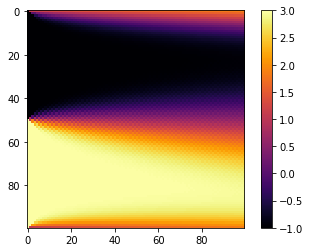

In [14]:
xlin = np.linspace(-1,1,100)
u_0 = np.array([init_cond(x) for x in xlin])
sol = lax_friedrichs(xlin, function, 0.01)
print(sol)
plt.imshow(sol, cmap="inferno")
plt.colorbar()

unstable

0.02
0.0004
[[-1.         -0.996672   -0.99320533 ...  2.95343773  3.1687646
   3.38082481]
 [-1.         -1.         -1.00006385 ...  0.70694035  0.61126243
   0.5336649 ]
 [-1.         -1.         -1.         ...  5.75659599  5.60483345
   5.43193973]
 ...
 [ 3.          3.          3.         ...  1.50363765  1.47635557
   1.46196248]
 [ 3.          3.          3.15659718 ...  4.42509573  4.29243352
   4.14961399]
 [ 3.         -0.996672   -0.99320533 ...  2.95343773  3.1687646
   3.38082481]]


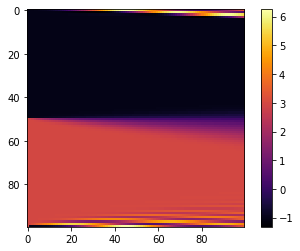

In [17]:
xlin = np.linspace(-1,1,100)
u_0 = np.array([init_cond(x) for x in xlin])
sol = lax_wendroff(xlin, function, 0.01)
print(sol)
plt.imshow(sol, cmap="inferno")
plt.colorbar()

unstable

## b) II)

In [18]:
def init_cond(x):
    if x <= 0: return 3
    else: return -1

def function(x):
    return x**2

0.02
0.0004
[[ 3.          0.92        0.92       ...  0.55284205  0.55284217
   0.54979759]
 [ 3.          3.          1.878464   ...  0.667963    0.66331771
   0.66331778]
 [ 3.          3.          3.         ...  0.7798438   0.77984384
   0.77367947]
 ...
 [-1.         -1.         -1.         ...  0.33341614  0.33341648
   0.33332506]
 [-1.         -1.         -0.038464   ...  0.44272473  0.44118441
   0.44118465]
 [-1.          0.92        0.92       ...  0.55284205  0.55284217
   0.54979759]]


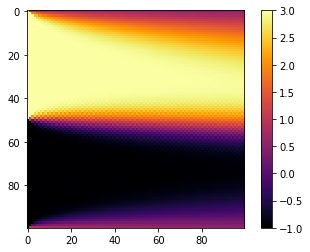

In [20]:
xlin = np.linspace(-1,1,100)
u_0 = np.array([init_cond(x) for x in xlin])
sol = lax_friedrichs(xlin, function, 0.01)
print(sol)
plt.imshow(sol, cmap="inferno")
plt.colorbar()

unstable

0.02
0.0004
[[ 3.          2.836928    2.68207019 ...  0.1986854   0.19645238
   0.19426722]
 [ 3.          3.          2.98923929 ...  0.47392265  0.46887296
   0.46392677]
 [ 3.          3.          3.         ...  0.73974666  0.73205505
   0.72451721]
 ...
 [-1.         -1.         -1.         ... -0.48876701 -0.48431491
  -0.47992332]
 [-1.         -1.         -0.99438148 ... -0.22778167 -0.22524535
  -0.22275807]
 [-1.          2.836928    2.68207019 ...  0.1986854   0.19645238
   0.19426722]]


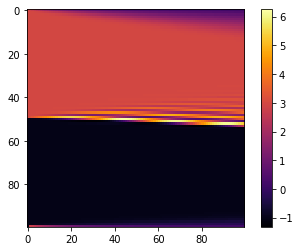

In [21]:
xlin = np.linspace(-1,1,100)
u_0 = np.array([init_cond(x) for x in xlin])
sol = lax_wendroff(xlin, function, 0.01)
print(sol)
plt.imshow(sol, cmap="inferno")
plt.colorbar()

unstable

## c) I)

In [22]:
def init_cond(x):
    if x <= 0: return -1
    else: return 3

def function(x):
    return x**3

0.02
0.0004
[[-1.          1.28        1.28       ...  2.72292931  2.68723209
   2.70080573]
 [-1.         -1.          0.17097152 ...  2.72249765  2.73533436
   2.70042637]
 [-1.         -1.         -1.         ...  2.76822821  2.73443274
   2.74700222]
 ...
 [ 3.          3.          3.         ...  2.67349472  2.63603907
   2.65083398]
 [ 3.          3.          2.38902848 ...  2.67340687  2.68741468
   2.65075524]
 [ 3.          1.28        1.28       ...  2.72292931  2.68723209
   2.70080573]]


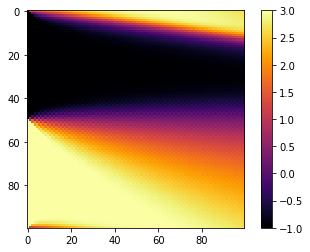

In [24]:
xlin = np.linspace(-1,1,100)
u_0 = np.array([init_cond(x) for x in xlin])
sol = lax_friedrichs(xlin, function, 0.01)
print(sol)
plt.imshow(sol, cmap="inferno")
plt.colorbar()

unstable

0.02
0.0004
[[-1.         -0.93805696 -0.87507429 ...  2.88815956  2.87607329
   2.86380082]
 [-1.         -1.         -0.9981005  ...  2.91118879  2.89985881
   2.88820318]
 [-1.         -1.         -1.         ...  2.93189758  2.92164881
   2.91090606]
 ...
 [ 3.          3.          3.         ...  2.83710102  2.82413852
   2.81118515]
 [ 3.          3.          3.49511783 ...  2.86336217  2.85074022
   2.8380432 ]
 [ 3.         -0.93805696 -0.87507429 ...  2.88815956  2.87607329
   2.86380082]]


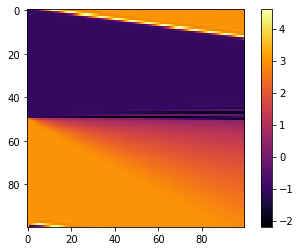

In [25]:
xlin = np.linspace(-1,1,100)
u_0 = np.array([init_cond(x) for x in xlin])
sol = lax_wendroff(xlin, function, 0.01)
print(sol)
plt.imshow(sol, cmap="inferno")
plt.colorbar()

unstable

## c) II)

In [26]:
def init_cond(x):
    if x <= 0: return 3
    else: return -1

def function(x):
    return x**3

0.02
0.0004
[[ 3.          0.72        0.72       ...  0.26589746  0.26590131
   0.26272352]
 [ 3.          3.          1.59373248 ...  0.36495634  0.36059074
   0.3605933 ]
 [ 3.          3.          3.         ...  0.45681459  0.45681587
   0.45140468]
 ...
 [-1.         -1.         -1.         ...  0.06587885  0.06588994
   0.06505138]
 [-1.         -1.         -0.15373248 ...  0.16772411  0.16570302
   0.16571048]
 [-1.          0.72        0.72       ...  0.26589746  0.26590131
   0.26272352]]


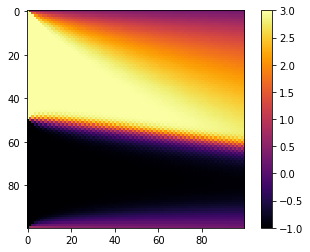

In [29]:
xlin = np.linspace(-1,1,100)
u_0 = np.array([init_cond(x) for x in xlin])
sol = lax_friedrichs(xlin, function, 0.01)
print(sol)
plt.imshow(sol, cmap="inferno")
plt.colorbar()

unstable

0.02
0.0004
[[ 3.          2.46746496  2.11402442 ... -1.64869427 -1.68631895
  -1.72278297]
 [ 3.          3.          2.81721313 ...  0.41884327  0.41008076
   0.40071154]
 [ 3.          3.          3.         ...  0.64780191  0.64351081
   0.63924287]
 ...
 [-1.         -1.         -1.         ... -0.30296692 -0.32414122
  -0.34607578]
 [-1.         -1.         -1.02377258 ... -1.00941212 -0.9714214
  -0.9336965 ]
 [-1.          2.46746496  2.11402442 ... -1.64869427 -1.68631895
  -1.72278297]]


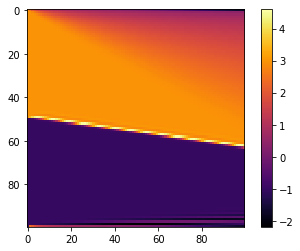

In [30]:
xlin = np.linspace(-1,1,100)
u_0 = np.array([init_cond(x) for x in xlin])
sol = lax_wendroff(xlin, function, 0.01)
print(sol)
plt.imshow(sol, cmap="inferno")
plt.colorbar()

unstable